In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

In [ ]:
DATADIR = '/content/drive/My Drive/cat-rabbit Tasks/cat-rabbit Task1/cat-rabbit/'
CATEGORIES = ["cat", "rabbit"]
for category in CATEGORIES:  # do cat and rabbit { 0 for cat  1 for rabbit} cat-rabbit/cat -- cat-rabbit/rabbit
    path = os.path.join(DATADIR,category)  # create path to cat and rabbit { cat-rabbit/cat -- cat-rabbit/rabbit }
    x=0 # counter {count only 10 photos}
    for img in os.listdir(path):  # iterate over each image per cat and rabbit
        x+=1
        img_array = cv2.imread(os.path.join(path,img))  # convert to array --> and convert photos in gray
        plt.imshow(img_array)  # graph it and mapping it into gray
        plt.show()  # display!
        if x==10 : # printing 10 images cat and 10 rabbit 
            break        

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(img_array)
print(img_array.shape)
#printing last photo
#before resizing the photo

[[[ 12  37  23]
  [  8  33  19]
  [  4  29  15]
  ...
  [  9  48  26]
  [  5  40  20]
  [ 10  45  25]]

 [[ 11  36  22]
  [  7  32  18]
  [  3  28  14]
  ...
  [ 12  51  29]
  [  7  42  22]
  [ 11  46  26]]

 [[ 10  35  21]
  [  7  32  18]
  [  3  28  14]
  ...
  [ 17  56  34]
  [ 13  48  28]
  [ 15  50  30]]

 ...

 [[ 86  77 120]
  [ 88  79 122]
  [ 91  81 127]
  ...
  [  1  24  10]
  [  1  26  12]
  [  3  29  15]]

 [[ 88  77 123]
  [ 89  78 124]
  [ 90  80 127]
  ...
  [  0  23   9]
  [  3  28  14]
  [  6  32  18]]

 [[ 89  78 124]
  [ 91  80 126]
  [ 91  81 128]
  ...
  [  1  24  10]
  [  3  28  14]
  [  5  31  17]]]
(300, 300, 3)


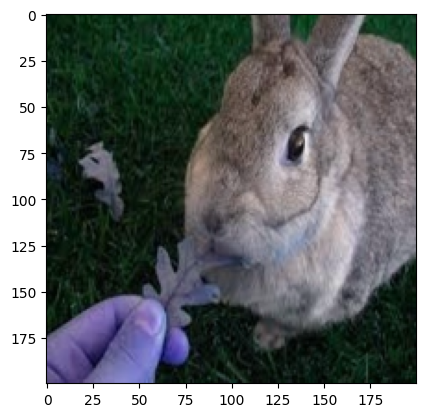

In [ ]:
#resizing image
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #resizing image 200x200
plt.imshow(new_array)
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do cat and rabbit {0 for cat and 1 for rabbit}
        path = os.path.join(DATADIR,category)  # create path to cat and rabbit
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1).
        for img in tqdm(os.listdir(path)):  # iterate over each image per cat and rabbit
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
                
           
create_training_data()
print(len(training_data))

100%|██████████| 800/800 [00:02<00:00, 269.91it/s]

1600


In [ ]:
print(training_data[:5])

[[array([[[143, 194, 208],
        [143, 200, 216],
        [139, 198, 218],
        ...,
        [ 81, 114, 147],
        [109, 144, 178],
        [ 63,  99, 134]],

       [[146, 194, 209],
        [150, 205, 222],
        [142, 200, 221],
        ...,
        [ 56,  87, 113],
        [ 65,  98, 126],
        [ 49,  84, 111]],

       [[147, 192, 207],
        [146, 198, 215],
        [147, 205, 225],
        ...,
        [ 95, 123, 140],
        [ 80, 110, 128],
        [ 85, 116, 135]],

       ...,

       [[ 80, 111, 142],
        [ 84, 115, 146],
        [ 86, 117, 148],
        ...,
        [ 29,  46,  75],
        [ 31,  46,  73],
        [ 36,  51,  77]],

       [[ 74, 105, 136],
        [ 79, 110, 141],
        [ 80, 111, 142],
        ...,
        [ 37,  52,  81],
        [ 29,  43,  70],
        [ 27,  42,  68]],

       [[ 67,  98, 129],
        [ 71, 102, 133],
        [ 72, 103, 134],
        ...,
        [ 32,  47,  76],
        [ 20,  35,  62],
        [ 20,  35,  61

In [ ]:
print(training_data[800:805])

[[array([[[ 73, 134, 103],
        [ 72, 135, 103],
        [ 69, 136, 104],
        ...,
        [118, 155, 139],
        [119, 156, 140],
        [121, 158, 142]],

       [[ 72, 135, 103],
        [ 70, 135, 103],
        [ 68, 137, 104],
        ...,
        [118, 155, 139],
        [120, 157, 141],
        [121, 158, 142]],

       [[ 69, 135, 103],
        [ 68, 135, 103],
        [ 67, 137, 104],
        ...,
        [118, 155, 139],
        [118, 156, 140],
        [120, 157, 141]],

       ...,

       [[ 12,  24,  42],
        [ 13,  25,  43],
        [ 20,  32,  50],
        ...,
        [  7,  10,  20],
        [  1,  10,  20],
        [  8,  21,  31]],

       [[ 13,  25,  43],
        [ 14,  26,  44],
        [ 23,  35,  53],
        ...,
        [  0,   3,  14],
        [  1,   9,  19],
        [  5,  14,  25]],

       [[ 15,  27,  45],
        [ 10,  22,  40],
        [ 19,  31,  49],
        ...,
        [  4,   6,  17],
        [  1,   6,  17],
        [  0,   5,  16

In [ ]:
import random
random.shuffle(training_data)
for sample in training_data[:15]:
    print(sample[1])

0
0
0
1
0
1
1
0
1
1
1
0
1
0
1


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,3)
y = np.array(y)
print(X[:20])
print(y[:20])

[[[[ 66  77  74]
   [ 67  78  75]
   [ 68  79  76]
   ...
   [ 55  58  56]
   [ 49  52  50]
   [ 48  51  49]]

  [[ 66  77  75]
   [ 67  78  75]
   [ 68  79  77]
   ...
   [ 56  59  57]
   [ 49  52  50]
   [ 46  49  47]]

  [[ 66  77  75]
   [ 67  78  76]
   [ 68  79  77]
   ...
   [ 59  62  60]
   [ 52  55  53]
   [ 51  54  52]]

  ...

  [[ 32  37  30]
   [ 26  30  24]
   [ 23  27  22]
   ...
   [ 89 118 137]
   [ 81 110 132]
   [ 76 104 127]]

  [[ 31  35  29]
   [ 25  29  24]
   [ 22  26  22]
   ...
   [ 89 119 139]
   [ 74 103 125]
   [ 60  89 113]]

  [[ 30  34  29]
   [ 24  27  25]
   [ 22  25  23]
   ...
   [ 72 102 122]
   [ 57  88 110]
   [ 43  74  97]]]]
[[[[ 66  77  74]
   [ 67  78  75]
   [ 68  79  76]
   ...
   [ 55  58  56]
   [ 49  52  50]
   [ 48  51  49]]

  [[ 66  77  75]
   [ 67  78  75]
   [ 68  79  77]
   ...
   [ 56  59  57]
   [ 49  52  50]
   [ 46  49  47]]

  [[ 66  77  75]
   [ 67  78  76]
   [ 68  79  77]
   ...
   [ 59  62  60]
   [ 52  55  53]
   [ 51  54 

In [ ]:
print(X.shape)

(1600, 200, 200, 3)


In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
 
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
print(x_train[1])

[[[ 37  35  34]
  [ 14  12  12]
  [  2   1   1]
  ...
  [ 53  70  78]
  [ 48  64  71]
  [ 50  64  70]]

 [[ 36  34  33]
  [ 14  13  12]
  [  5   5   5]
  ...
  [ 53  70  78]
  [ 55  70  77]
  [ 81  95 101]]

 [[ 32  30  30]
  [ 12  12  12]
  [ 13  14  14]
  ...
  [ 59  77  86]
  [ 75  91 100]
  [130 145 152]]

 ...

 [[243 234 231]
  [243 234 231]
  [243 234 231]
  ...
  [244 234 227]
  [241 231 224]
  [242 232 225]]

 [[242 233 230]
  [242 233 230]
  [242 233 230]
  ...
  [243 233 226]
  [239 229 222]
  [240 230 223]]

 [[242 233 230]
  [242 233 230]
  [242 233 230]
  ...
  [242 232 225]
  [236 226 219]
  [238 228 221]]]


In [ ]:
print(x_test[1])

[[[ 31  43  13]
  [ 33  43  13]
  [ 33  43  13]
  ...
  [ 19  31   1]
  [ 18  30   0]
  [ 17  29   1]]

 [[ 34  45  15]
  [ 35  45  15]
  [ 35  45  15]
  ...
  [ 19  31   1]
  [ 18  30   0]
  [ 17  29   1]]

 [[ 34  44  14]
  [ 34  44  14]
  [ 34  44  14]
  ...
  [ 19  31   1]
  [ 18  30   0]
  [ 17  29   1]]

 ...

 [[125 127 115]
  [126 128 116]
  [128 128 114]
  ...
  [ 59  88   9]
  [ 59  87  10]
  [ 60  86   9]]

 [[125 127 115]
  [125 127 115]
  [126 129 113]
  ...
  [ 57  86  10]
  [ 58  85  10]
  [ 59  85  11]]

 [[124 126 114]
  [124 127 113]
  [126 128 113]
  ...
  [ 54  84   9]
  [ 55  84  10]
  [ 57  84  11]]]


In [ ]:
print(x_train.shape)
print(x_test.shape)

x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

(1280, 200, 200, 3)
(320, 200, 200, 3)


In [ ]:
print(x_train[1])

[[[0.01193294 0.01149568 0.011177  ]
  [0.00450548 0.00393425 0.00394086]
  [0.00064163 0.00032704 0.00032783]
  ...
  [0.01753689 0.02358824 0.02632789]
  [0.01596077 0.02165766 0.02407396]
  [0.01667453 0.02173493 0.02382319]]

 [[0.01161043 0.01116723 0.01084826]
  [0.00450548 0.0042621  0.00394086]
  [0.00160408 0.0016352  0.00163917]
  ...
  [0.01753689 0.02358824 0.02632789]
  [0.01828838 0.02368806 0.02610838]
  [0.02701274 0.03226278 0.03437346]]

 [[0.01032038 0.00985344 0.00986205]
  [0.00386184 0.00393425 0.00394086]
  [0.00417061 0.00457856 0.00458967]
  ...
  [0.0195222  0.02594706 0.02902819]
  [0.02493871 0.03079448 0.03390699]
  [0.04335378 0.0492432  0.05173036]]

 ...

 [[0.07837042 0.0768568  0.07593782]
  [0.07820225 0.07671778 0.07586161]
  [0.07795838 0.07652742 0.07572963]
  ...
  [0.08073588 0.0788521  0.07662092]
  [0.08013638 0.0781706  0.07595166]
  [0.08070472 0.07878911 0.07657455]]

 [[0.07804791 0.07652835 0.07560908]
  [0.07788043 0.07638992 0.07553321]


In [ ]:
print(x_test[1])

[[[0.02887401 0.03814965 0.01429464]
  [0.03065981 0.03811702 0.01425035]
  [0.03048503 0.03792617 0.01419781]
  ...
  [0.02217068 0.02429836 0.00128271]
  [0.02093412 0.02311314 0.        ]
  [0.01993114 0.02232242 0.00170864]]

 [[0.03166827 0.03992405 0.01649382]
  [0.03251798 0.0398899  0.01644271]
  [0.03233261 0.03969018 0.01638209]
  ...
  [0.02217068 0.02429836 0.00128271]
  [0.02093412 0.02311314 0.        ]
  [0.01993114 0.02232242 0.00170864]]

 [[0.03166827 0.03903685 0.01539423]
  [0.0315889  0.03900346 0.01534653]
  [0.03140882 0.03880818 0.01528995]
  ...
  [0.02217068 0.02429836 0.00128271]
  [0.02093412 0.02311314 0.        ]
  [0.01993114 0.02232242 0.00170864]]

 ...

 [[0.11642747 0.11267454 0.1264526 ]
  [0.11706474 0.11346461 0.12715698]
  [0.11824497 0.11289651 0.12450387]
  ...
  [0.06884579 0.06897598 0.01154438]
  [0.06861741 0.0670281  0.01497808]
  [0.0703452  0.06619752 0.01537774]]

 [[0.11642747 0.11267454 0.1264526 ]
  [0.11613565 0.11257817 0.1260608 ]


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
40/40 [==============================] - 161s 4s/step - loss: 0.6882 - accuracy: 0.5445
Epoch 2/10
40/40 [==============================] - 162s 4s/step - loss: 0.5987 - accuracy: 0.6805
Epoch 3/10
40/40 [==============================] - 162s 4s/step - loss: 0.5509 - accuracy: 0.7344
Epoch 4/10
40/40 [==============================] - 160s 4s/step - loss: 0.4963 - accuracy: 0.7531
Epoch 5/10
40/40 [==============================] - 161s 4s/step - loss: 0.4335 - accuracy: 0.7969
Epoch 6/10
40/40 [==============================] - 167s 4s/step - loss: 0.3659 - accuracy: 0.8492
Epoch 7/10
40/40 [==============================] - 161s 4s/step - loss: 0.2915 - accuracy: 0.8797
Epoch 8/10
40/40 [==============================] - 163s 4s/step - loss: 0.2379 - accuracy: 0.9023
Epoch 9/10
40/40 [==============================] - 161s 4s/step - loss: 0.1674 - accuracy: 0.9398
Epoch 10/10
40/40 [==============================] - 169s 4s/step - loss: 0.1163 - accuracy: 0.9594


In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
test_acc

10/10 [==============================] - 11s 1s/step - loss: 0.4222 - accuracy: 0.8687


0.8687499761581421

In [ ]:
print(x_test[:10])
print(y_test[:10])

[[[[0.04563423 0.04816319 0.0475428 ]
   [0.04621178 0.04869169 0.04801298]
   [0.04636407 0.04884274 0.04757471]
   ...
   [0.02762103 0.03445877 0.0482797 ]
   [0.02657013 0.03350058 0.04754357]
   [0.02789445 0.03587845 0.04978275]]

  [[0.04767755 0.05003968 0.04924076]
   [0.04825053 0.05056445 0.04970755]
   [0.04909137 0.05134749 0.05040654]
   ...
   [0.02644566 0.0339118  0.0477969 ]
   [0.02538923 0.03404977 0.04802871]
   [0.02789445 0.03643043 0.05027081]]

  [[0.04631534 0.04878868 0.04867477]
   [0.04757095 0.0499402  0.04914269]
   [0.04840954 0.0507213  0.04984018]
   ...
   [0.0252703  0.03445877 0.0482797 ]
   [0.02420834 0.03459896 0.04802871]
   [0.02670745 0.0369824  0.05027081]]

  ...

  [[0.09671732 0.09444989 0.09338764]
   [0.08834605 0.08677109 0.08642336]
   [0.09204631 0.09017121 0.08948577]
   ...
   [0.10049352 0.09790665 0.0946282 ]
   [0.0986047  0.09665741 0.09217631]
   [0.10030133 0.09825176 0.09322063]]

  [[0.09671732 0.09444989 0.09338764]
   [0.0

In [ ]:
output = model.predict(x_test)
output[:10]

10/10 [==============================] - 11s 1s/step


array([[9.99996841e-01, 3.07310302e-06],
       [9.99843597e-01, 1.56536044e-04],
       [9.11937833e-01, 8.80622044e-02],
       [9.98354077e-01, 1.64595176e-03],
       [7.20415672e-04, 9.99279559e-01],
       [8.71167239e-03, 9.91288304e-01],
       [9.64955688e-01, 3.50443237e-02],
       [9.99895632e-01, 1.04241946e-04],
       [2.31521845e-01, 7.68478215e-01],
       [8.94809365e-01, 1.05190627e-01]], dtype=float32)

In [ ]:
y_pred=np.argmax(output, axis=1)

print(y_test[:20])
print(y_pred[:20])

[0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1]
[0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       179
           1       0.82      0.90      0.86       141

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[151  14]
 [ 28 127]]


In [ ]:
model.save('model.h5') #Save Model 